In [115]:
%load_ext autoreload
%autoreload 2
import utils
import importlib
importlib.reload(utils)

figs_dir = '/Users/atk42/OneDrive - Yale University/Kuan Lab Shared/Projects/TEM_tomo/fig_panels/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


((36, 36), (36, 36), (36, 36))

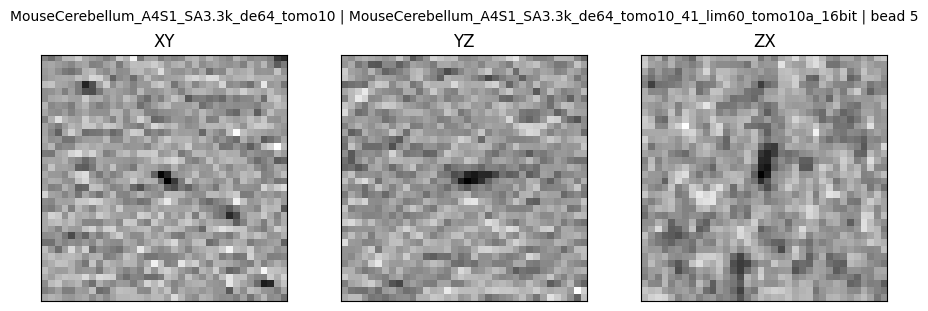

In [34]:
# Spot-check bead image downloads
utils.plot_bead_views("MouseCerebellum_A4S1_SA3.3k_de64_tomo10",
                      "MouseCerebellum_A4S1_SA3.3k_de64_tomo10_41_lim60_tomo10a_16bit",
                      5, root_dir="250827_beads_data", clip_percentile = None)
xy, yz, zx = views["XY"], views["YZ"], views["ZX"]
xy.shape, yz.shape, zx.shape

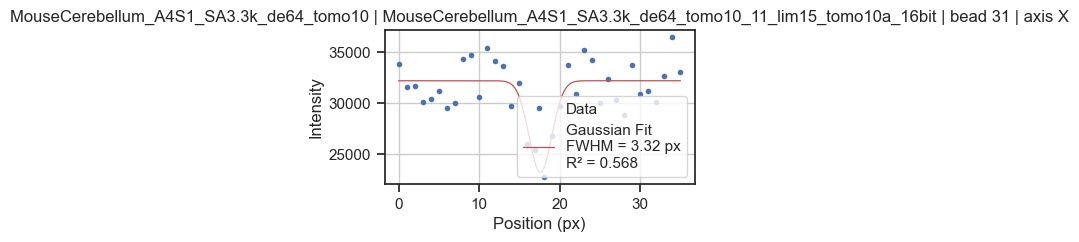

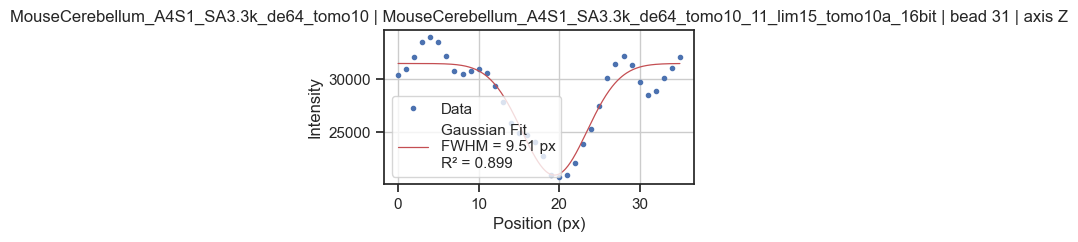

In [159]:
import utils

res = utils.spot_check_fit_minimal(
    tomogram="MouseCerebellum_A4S1_SA3.3k_de64_tomo10",
    recon_label="MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim15_tomo10a_16bit",
    bead_index=31,
    root_dir="250827_beads_data",
    axes_to_show=("X","Z"),
    linewidth=1,
    # bead_diam_nm=0.0, pixel_size_nm=None  # defaults
)

In [160]:
from importlib import reload
import utils; reload(utils)

beads_df_3k = utils.fits_dataframe_from_config(
    "250827_tomograms_beads.yaml",
    root_dir="250827_beads_data",
    linewidth=1,
    r2_cutoff=0.5,      # your default
    bead_diam_nm=0.0,  
    # keep 0 (no deconvolution)
)
beads_df_3k.head()


/Users/atk42/Repos/tem-tomo/bead_resolution/utils.py:310: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(gaussian, x, profile_1d, p0=p0)


⚠️ Gaussian fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
[MouseCerebellum_A4S1_SA3.3k_de64_tomo10] beads: total=65, pass (R²≥0.5)=14 (21.5%)
[MouseCerebellum_A3S1_SA3.3k_de64_tomo10] beads: total=20, pass (R²≥0.5)=13 (65.0%)
[MouseCerebellum_A2S1_SA3.3k_de64_tomo14] beads: total=71, pass (R²≥0.5)=53 (74.6%)


,tomogram,thickness,pxl_size,recon_label,num_proj,max_angle,bead_id,n_beads_total,n_beads_pass,fwhm_x,fwhm_y,fwhm_z,res_nm_x,res_nm_y,res_nm_z
0,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,1,65,14,2.026701,1.318365,5.991621,9.930836,6.459989,29.358944
1,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,4,65,14,2.423548,1.337364,15.483569,11.875387,6.553084,75.869489
2,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,5,65,14,2.627142,1.571910,12.402880,12.872993,7.702360,60.774113
3,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,7,65,14,3.148302,1.300087,9.539849,15.426682,6.370426,46.745259
4,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,8,65,14,2.014471,1.468394,9.338075,9.870907,7.195132,45.756567


In [157]:
beads_df_3k[0:20]

,tomogram,thickness,pxl_size,recon_label,num_proj,max_angle,bead_id,n_beads_total,n_beads_pass,fwhm_x,fwhm_y,fwhm_z,res_nm_x,res_nm_y,res_nm_z
0,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,1,65,14,2.026701,1.318365,5.991621,9.930836,6.459989,29.358944
1,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,4,65,14,2.423548,1.337364,15.483569,11.875387,6.553084,75.869489
2,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,5,65,14,2.627142,1.571910,12.402880,12.872993,7.702360,60.774113
3,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,7,65,14,3.148302,1.300087,9.539849,15.426682,6.370426,46.745259
4,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,8,65,14,2.014471,1.468394,9.338075,9.870907,7.195132,45.756567
5,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,12,65,14,2.538037,0.248735,17.401155,12.436384,1.218803,85.265658
6,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,16,65,14,1.881891,0.592173,6.660693,9.221267,2.901647,32.637393
7,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,17,65,14,2.607473,1.596188,16.849892,12.776616,7.821320,82.564472
8,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,19,65,14,2.228657,1.443201,6.383600,10.920418,7.071683,31.279642
9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo10_11_lim...,11.0,15.0,21,65,14,1.782159,0.584075,8.889888,8.732577,2.861967,43.560452


/Users/atk42/Repos/tem-tomo/bead_resolution/utils.py:718: FutureWarning: The provided callable <function nanmedian at 0x10a149120> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.


Text(0.5, 1.0, 'Resolution vs Tilt Range (Z-axis)')

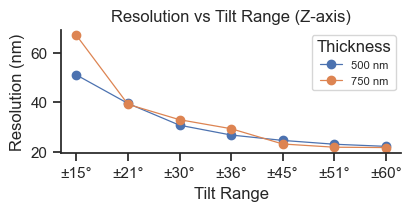

In [143]:
import seaborn as sns

max_angs = [15,21,30,36,45,51,60]
theta_labels = [f"±{ang}°" for ang in max_angs]

sns.set_theme(rc={'figure.figsize':(4,2), 'lines.linewidth':0.8}, style='ticks')
fig, ax = utils.plot_fwhm_z_summary_line_by_thickness(
    beads_df_3k,                       # DataFrame from fits_dataframe_from_config(...)
    units="nm",               # or "px"
    max_angs=max_angs,
    theta_labels=theta_labels,
    agg="median",
)

ax.set_title('Resolution vs Tilt Range (Z-axis)')
# fig.savefig("figs/fwhmZ_single_axis.pdf", bbox_inches='tight')

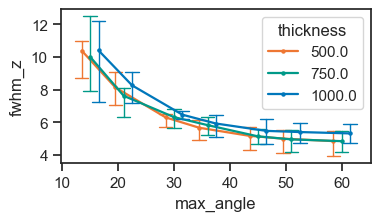

In [67]:
thick_pal={'1000nm':'#0077BB','750nm':'#009988','500nm':'#EE7733'}
thick_pal={1000.0:'#0077BB',750.0:'#009988',500.0:'#EE7733'}
g = sns.pointplot(df,x='max_angle', y = 'fwhm_z', hue='thickness', estimator='mean',
            errorbar=('pi',50), 
            #errorbar = ('ci', 95),
            native_scale=True, dodge = 0.5, palette=thick_pal,
            log_scale = False,  markersize = 2, capsize = .4,
            err_kws={'linewidth':1})

Tomogram = MouseCerebellum_A4S1_SA3.3k_de64_tomo10
N = 70 beads, Thickness = 1000.0
11.0: 50.9 ± 12.23 nm
15.0: 40.4 ± 4.73 nm
21.0: 31.7 ± 1.19 nm
25.0: 29.0 ± 3.38 nm
31.0: 26.8 ± 3.63 nm
35.0: 26.5 ± 3.06 nm
41.0: 26.0 ± 2.88 nm
Tomogram = MouseCerebellum_A3S1_SA3.3k_de64_tomo10
N = 70 beads, Thickness = 750.0
11.0: 49.0 ± 11.17 nm
15.0: 37.3 ± 4.39 nm
21.0: 30.9 ± 2.94 nm
25.0: 28.5 ± 2.78 nm
31.0: 25.2 ± 2.28 nm
35.0: 24.3 ± 3.22 nm
41.0: 23.7 ± 3.20 nm
Tomogram = MouseCerebellum_A2S1_SA3.3k_de64_tomo14
N = 308 beads, Thickness = 500.0
11.0: 50.8 ± 5.45 nm
15.0: 39.8 ± 4.94 nm
21.0: 30.8 ± 1.86 nm
25.0: 27.7 ± 2.93 nm
31.0: 25.3 ± 3.50 nm
35.0: 24.5 ± 3.48 nm
41.0: 23.7 ± 3.78 nm


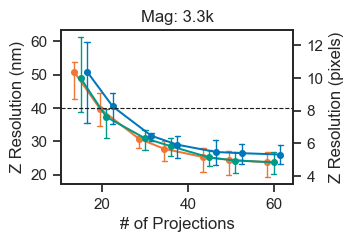

In [123]:
# Main Plot for FSC res vs # projections 
# Fig. 1e
max_ang = 30 # Plot for +- 30 deg
mag = '3.3k'
#mag = '11k'
if mag == '3.3k':
    my_df = beads_df_3k
elif mag == '11k':
    my_df = beads_df_11k

#pixel_size = my_df['pixel_size'].values[0]

sns.set_theme(rc={'figure.figsize':(3,2),'lines.linewidth':0.8},style = 'ticks')

g = sns.pointplot(my_df,x='max_angle', y = 'res_nm_z', hue='thickness', estimator='mean',
            errorbar=('pi',50), 
            #errorbar = None,
            native_scale=True, dodge = 0.5, palette=thick_pal,
            log_scale = False,  markersize = 4, capsize = .2,
            err_kws={'linewidth':1})


handles, labels = g.get_legend_handles_labels()
order = [2,1,0]
g.legend().remove()
#g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
#         title = 'Thickness', bbox_to_anchor=(-0.3, -.8), loc='lower left',ncol=3)
g.axhline(y=40, color = 'k', linestyle = '--')
g.set_xlabel('# of Projections')
g.set_ylabel('Z Resolution (nm)')
g.set_title('Mag: %s' % mag)#, ha='left', x = 0.1)
#g.grid(axis='y', color = 'k', linewidth=0.5)
#g.set_ylim([0,g.get_ylim()[1]])

pixel_size = my_df['pxl_size'].values[0]
ax2 = g.twinx()
y1, y2 = g.get_ylim()
ax2.set_ylim(y1/pixel_size, y2/pixel_size)
#ax2.set_yticks([2,3])
ax2.set_ylabel('Z Resolution (pixels)')
#sns.despine()

import numpy as np
import scipy.stats as stats
#num_ang = 21
for tomo in my_df.tomogram.unique():
    thickness = my_df[my_df.tomogram == tomo]['thickness'].values[0]
    n_beads = len(my_df[my_df.tomogram == tomo])
    #for thickness in my_df.thickness.unique():
    print('Tomogram = %s' % tomo)
    print('N = %i beads, Thickness = %0.1f' % (n_beads,thickness))
    for num_proj in my_df.num_proj.unique():
        test_df = my_df[my_df.thickness == thickness]
        test_df = test_df[test_df.num_proj == num_proj]
        print('%s: %0.1f ± %0.2f nm' % (num_proj,np.mean(test_df.res_nm_z.values),stats.iqr(test_df.res_nm_z.values)/2))

import matplotlib.pyplot as plt
plt.savefig(figs_dir + '250917_rev_Fig1g_Zres_beads_%s.pdf' % mag, bbox_inches = 'tight')
